In [1]:
%pip install --upgrade matplotlib numpy ipympl


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import functools
import math

%matplotlib widget

In [3]:
with open('eng.2015.2.csv', 'r') as file:
    reader = csv.DictReader(file)
    csv_data = list(reader)

# Replace the team names with the first two letters of each word in the name
mapping = {}
for i in range(len(csv_data)):
    t1name = ''.join([word[:2] for word in csv_data[i]['Team 1'].split()])
    t2name = ''.join([word[:2] for word in csv_data[i]['Team 2'].split()])
    if t1name not in mapping:
        mapping[t1name] = csv_data[i]['Team 1']
    if t2name not in mapping:
        mapping[t2name] = csv_data[i]['Team 2']

    # Check for collisions
    if mapping[t1name] != csv_data[i]['Team 1']:
        print(f'Collision for {csv_data[i]["Team 1"]} with {mapping[t1name]}')
    if mapping[t2name] != csv_data[i]['Team 2']:
        print(f'Collision for {csv_data[i]["Team 2"]} with {mapping[t2name]}')

    csv_data[i]['Team 1'] = t1name
    csv_data[i]['Team 2'] = t2name

    csv_data[i]['Scores'] = [int(score) for score in csv_data[i]['FT'].split('-')]

mapping

{'Br&HoAlFC': 'Brighton & Hove Albion FC',
 'NoFoFC': 'Nottingham Forest FC',
 'CaCiFC': 'Cardiff City FC',
 'FuFC': 'Fulham FC',
 'LeUnFC': 'Leeds United FC',
 'BuFC': 'Burnley FC',
 'ShWeFC': 'Sheffield Wednesday FC',
 'BrCiFC': 'Bristol City FC',
 'RoUnFC': 'Rotherham United FC',
 'MiKeDoFC': 'Milton Keynes Dons FC',
 'HuCiAF': 'Hull City AFC',
 'HuToAF': 'Huddersfield Town AFC',
 'ChAtFC': 'Charlton Athletic FC',
 'QuPaRaFC': 'Queens Park Rangers FC',
 'BrFC': 'Brentford FC',
 'IpToFC': 'Ipswich Town FC',
 'BoWaFC': 'Bolton Wanderers FC',
 'DeCoFC': 'Derby County FC',
 'BlRoFC': 'Blackburn Rovers FC',
 'WoWaFC': 'Wolverhampton Wanderers FC',
 'BiCiFC': 'Birmingham City FC',
 'ReFC': 'Reading FC',
 'PrNoEnFC': 'Preston North End FC',
 'MiFC': 'Middlesbrough FC'}

Reference data snippet: 
```json
 {'Round': '35',
  'Date': 'Sat Mar 5 2016',
  'Team 1': 'Brentford FC',
  'FT': '1-2',
  'Team 2': 'Charlton Athletic FC'}
```

In [4]:
# Seperate out the teams
teams = set([row['Team 1'] for row in csv_data])
teams.update([row['Team 2'] for row in csv_data])
print(len(teams), 'teams', teams)

24 teams {'RoUnFC', 'CaCiFC', 'IpToFC', 'FuFC', 'BoWaFC', 'ShWeFC', 'LeUnFC', 'ChAtFC', 'MiFC', 'PrNoEnFC', 'BrFC', 'BiCiFC', 'BuFC', 'BlRoFC', 'DeCoFC', 'MiKeDoFC', 'BrCiFC', 'Br&HoAlFC', 'WoWaFC', 'HuToAF', 'QuPaRaFC', 'ReFC', 'NoFoFC', 'HuCiAF'}


In [5]:
# Split rounds into training and test datasets
training_data = csv_data[:len(csv_data)//2]
test_data = csv_data[len(csv_data)//2:]

# Model 0

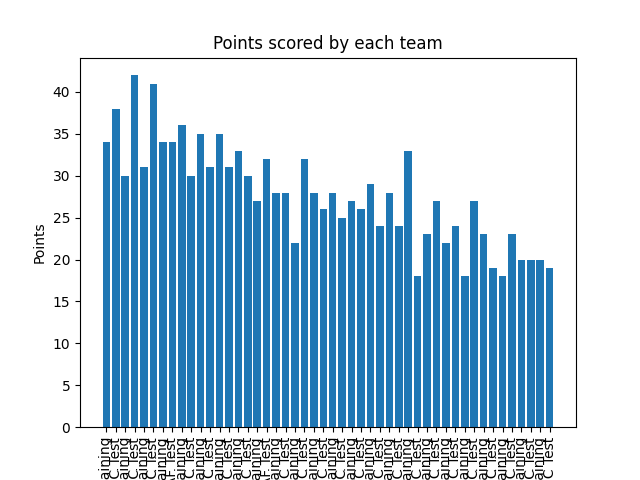

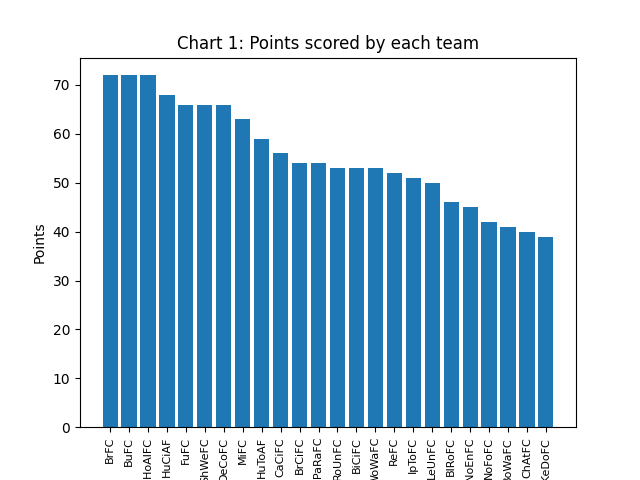

In [6]:
# Graph number of points scored by each team
team_points = {}
training_points = {}
test_points = {}
for team in teams:
    team_points[team] = 0
    training_points[team] = 0
    test_points[team] = 0

for row in csv_data:
    scores = row['FT'].split('-')
    team_points[row['Team 1']] += int(scores[0])
    team_points[row['Team 2']] += int(scores[1])

    dataset = training_points if row in training_data else test_points
    dataset[row['Team 1']] += int(scores[0])
    dataset[row['Team 2']] += int(scores[1])


# Sort the teams by points
sorted_teams = sorted(teams, key=lambda team: team_points[team], reverse=True)

# Plot the points scored by each team in each of the datasets
fig, ax = plt.subplots()

x = [team+" "+dataset for team in sorted_teams for dataset in ["Training", "Test"]]
y = [training_points[team] if dataset == "Training" else test_points[team] for team in sorted_teams for dataset in ["Training", "Test"]]
ax.bar(x, y)

ax.set_ylabel('Points')
ax.set_title('Points scored by each team')
plt.xticks(rotation=90)
plt.show()

# Plot total points
fig, ax = plt.subplots()

x = sorted_teams
y = [team_points[team] for team in sorted_teams]
ax.bar(x, y)

ax.set_ylabel('Points')
ax.set_title('Chart 1: Points scored by each team')
plt.xticks(rotation=90, size=8)
plt.show()

In [7]:
sorted_teams = sorted(teams, key=lambda team: training_points[team], reverse=True)
for match in training_data:
    match['Winner'] = "tie" if match['Scores'][0] == match['Scores'][1] else match['Team 1'] if match['Scores'][0] > match['Scores'][1] else match['Team 2']
    match['Higher Scoring Team'] = match['Team 1'] if sorted_teams.index(match['Team 1']) < sorted_teams.index(match['Team 2']) else match['Team 2']
for match in test_data:
    match['Winner'] = "tie" if match['Scores'][0] == match['Scores'][1] else match['Team 1'] if match['Scores'][0] > match['Scores'][1] else match['Team 2']
    match['Higher Scoring Team'] = match['Team 1'] if sorted_teams.index(match['Team 1']) < sorted_teams.index(match['Team 2']) else match['Team 2']

In [8]:
# Percentage of matches won by the higher scoring team
higher_scoring_wins = [match for match in training_data if match['Winner'] == match['Higher Scoring Team']]
higher_scoring_losses = [match for match in training_data if match['Winner'] != match['Higher Scoring Team'] and match['Winner'] != "tie"]
ties = [match for match in training_data if match['Winner'] == "tie"]
print(f'Higher scoring team wins: {len(higher_scoring_wins)} ({len(higher_scoring_wins)/len(training_data)*100:.2f}%)')
print(f'Higher scoring team losses: {len(higher_scoring_losses)} ({len(higher_scoring_losses)/len(training_data)*100:.2f}%)')
print(f'Ties: {len(ties)} ({len(ties)/len(training_data)*100:.2f}%)')

Higher scoring team wins: 119 (43.27%)
Higher scoring team losses: 66 (24.00%)
Ties: 90 (32.73%)


[1, 2, 2, 1, 3, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 1, 3, 4, 2, 1, 1, 2, 3, 1, 3, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 3, 2, 1, 1, 2, 1, 1, 2, 2, 3, 2, 1, 3, 1, 2, 1, 2, 3, 3, 1, 3, 1, 2, 1, 3, 3, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 3, 3, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 4, 1, 3, 1, 1, 4, 2, 3, 1, 1, 3, 4, 1, 3, 2, 1]
Average point difference when higher scoring team wins: 1.7226890756302522
Most common point difference: 1
Occurences: 60
Occurences (normalized): 50.42%
[3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 4, 1, 2, 1, 1, 2, 1, 1, 1, 3, 2, 2, 2, 2, 3, 1, 3, 1, 2, 1, 1, 1, 2, 1, 2, 1, 3, 3, 2, 1, 2, 2, 3, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2]
Average point difference when higher scoring team loses: 1.5909090909090908
Most common point difference: 1
Occurences: 36
Occurences (normalized): 54.55%


<BarContainer object of 4 artists>

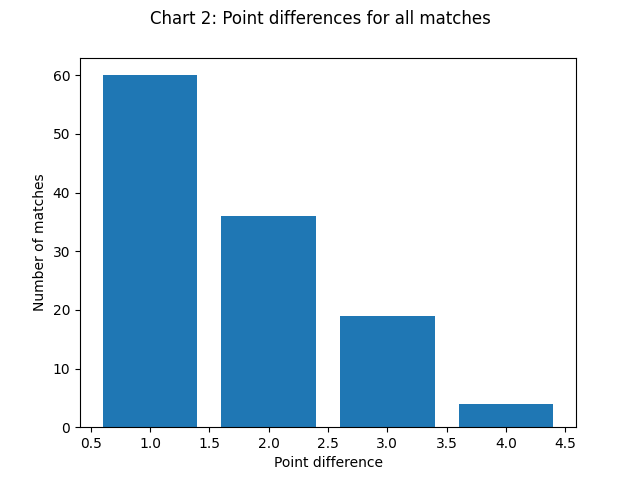

In [9]:
# Average Point difference if the higher team wins vs when they don't
point_diff_win = [abs(int(match['Scores'][0]) - int(match['Scores'][1])) for match in higher_scoring_wins]
print(point_diff_win)
print(f'Average point difference when higher scoring team wins: {sum(point_diff_win)/len(point_diff_win)}')

# Find most common difference
diff_counts = {}
for diff in point_diff_win:
    if diff not in diff_counts:
        diff_counts[diff] = 0
    diff_counts[diff] += 1
print(f'Most common point difference: {max(diff_counts, key=diff_counts.get)}')
print(f'Occurences: {diff_counts[max(diff_counts, key=diff_counts.get)]}')
print(f'Occurences (normalized): {diff_counts[max(diff_counts, key=diff_counts.get)]/len(point_diff_win)*100:.2f}%')

point_diff_loss = [abs(int(match['Scores'][0]) - int(match['Scores'][1])) for match in higher_scoring_losses]
print(point_diff_loss)
print(f'Average point difference when higher scoring team loses: {sum(point_diff_loss)/len(point_diff_loss)}')

# Find most common difference
diff_counts = {}
for diff in point_diff_loss:
    if diff not in diff_counts:
        diff_counts[diff] = 0
    diff_counts[diff] += 1
print(f'Most common point difference: {max(diff_counts, key=diff_counts.get)}')
print(f'Occurences: {diff_counts[max(diff_counts, key=diff_counts.get)]}')
print(f'Occurences (normalized): {diff_counts[max(diff_counts, key=diff_counts.get)]/len(point_diff_loss)*100:.2f}%')


# Graph of the point differences
fig, ax = plt.subplots()

x = sorted(set(point_diff_win + point_diff_loss))
y = [point_diff_win.count(diff) for diff in x]

fig.suptitle('Chart 2: Point differences for all matches')

# Add axis labels
ax.set_xlabel('Point difference')
ax.set_ylabel('Number of matches')


ax.bar(x, y)


In [10]:
# Percentage of matches won by the home team
home_wins = [match for match in training_data if match['Winner'] == match['Team 1'] and match['Winner'] != "tie"]
home_wins_percentage = len(home_wins) / len([match for match in training_data if match['Winner'] != "tie"])
home_wins_percentage

0.6108108108108108

In [11]:
def make_prediction(match):
    team1win = sorted_teams.index(match['Team 1']) > sorted_teams.index(match['Team 2'])
    return (
        0 if sorted_teams.index(match['Team 1']) == sorted_teams.index(match['Team 2']) else 1, 
        match['Team 1'] if team1win else match['Team 2'])

In [12]:
correct_guesses = [match for match in test_data if ((match['Winner'] == 'tie' or match['Winner']==make_prediction(match)[1]) and abs(match['Scores'][0]-match['Scores'][1]) == make_prediction(match)[0])]
print(f'Correct guesses: {len(correct_guesses)} ({len(correct_guesses)/len(test_data)*100:.2f}%)')

Correct guesses: 53 (19.27%)


In [13]:
# Count the number of games each team plays against each other
team_matches = {}

for team in teams:
    team_matches[team] = {}
    for team2 in teams:
        if team != team2:
            team_matches[team][team2] = 0

for match in training_data:
    team_matches[match['Team 1']][match['Team 2']] += 1
    team_matches[match['Team 2']][match['Team 1']] += 1

team_matches

{'RoUnFC': {'CaCiFC': 1,
  'IpToFC': 1,
  'FuFC': 1,
  'BoWaFC': 1,
  'ShWeFC': 1,
  'LeUnFC': 1,
  'ChAtFC': 1,
  'MiFC': 1,
  'PrNoEnFC': 1,
  'BrFC': 1,
  'BiCiFC': 1,
  'BuFC': 1,
  'BlRoFC': 1,
  'DeCoFC': 1,
  'MiKeDoFC': 1,
  'BrCiFC': 1,
  'Br&HoAlFC': 1,
  'WoWaFC': 1,
  'HuToAF': 1,
  'QuPaRaFC': 1,
  'ReFC': 1,
  'NoFoFC': 1,
  'HuCiAF': 1},
 'CaCiFC': {'RoUnFC': 1,
  'IpToFC': 1,
  'FuFC': 1,
  'BoWaFC': 1,
  'ShWeFC': 1,
  'LeUnFC': 1,
  'ChAtFC': 1,
  'MiFC': 1,
  'PrNoEnFC': 1,
  'BrFC': 1,
  'BiCiFC': 1,
  'BuFC': 1,
  'BlRoFC': 1,
  'DeCoFC': 1,
  'MiKeDoFC': 1,
  'BrCiFC': 1,
  'Br&HoAlFC': 1,
  'WoWaFC': 1,
  'HuToAF': 1,
  'QuPaRaFC': 1,
  'ReFC': 1,
  'NoFoFC': 1,
  'HuCiAF': 1},
 'IpToFC': {'RoUnFC': 1,
  'CaCiFC': 1,
  'FuFC': 1,
  'BoWaFC': 1,
  'ShWeFC': 1,
  'LeUnFC': 1,
  'ChAtFC': 1,
  'MiFC': 1,
  'PrNoEnFC': 1,
  'BrFC': 1,
  'BiCiFC': 1,
  'BuFC': 1,
  'BlRoFC': 1,
  'DeCoFC': 1,
  'MiKeDoFC': 1,
  'BrCiFC': 1,
  'Br&HoAlFC': 1,
  'WoWaFC': 1,
  'HuToAF':

Text(0.5, 1.0, 'Chart 3: Dominance matrix')

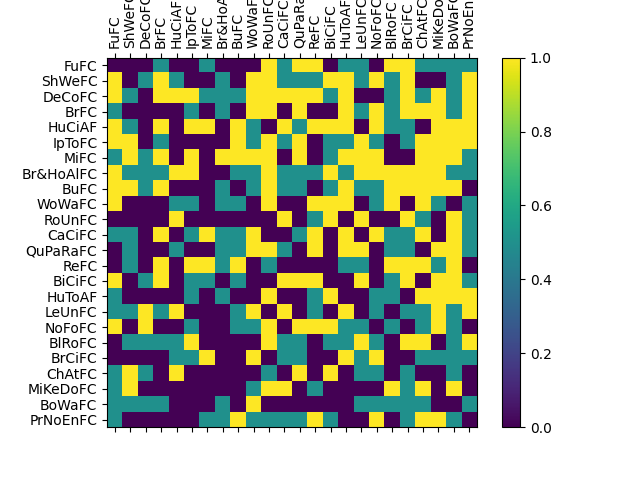

In [14]:
# Construct dominance matrix from training_data
dominance_matrix = np.zeros((len(teams), len(teams)))

for match in training_data:
    team1 = sorted_teams.index(match['Team 1'])
    team2 = sorted_teams.index(match['Team 2'])
    if match['Winner'] == match['Team 1']:
        dominance_matrix[team1][team2] += 1
    elif match['Winner'] == match['Team 2']:
        dominance_matrix[team2][team1] += 1
    else:
        dominance_matrix[team1][team2] += 0.5
        dominance_matrix[team2][team1] += 0.5


# Plot the dominance matrix
fig, ax = plt.subplots()

cax = ax.matshow(dominance_matrix, cmap='viridis')

fig.colorbar(cax)

ax.set_xticks(np.arange(len(teams)))

ax.set_yticks(np.arange(len(teams)))

ax.set_xticklabels(sorted_teams, rotation=90)

ax.set_yticklabels(sorted_teams)

ax.set_title('Chart 3: Dominance matrix')

Text(0.5, 0.98, 'Chart 4: Second order dominance matrix')

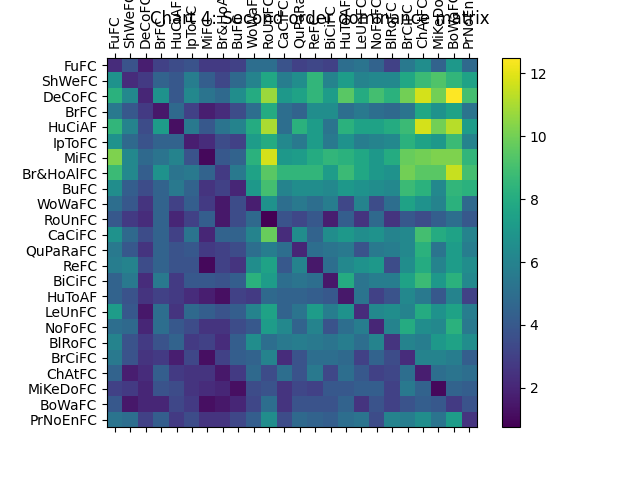

In [15]:
# Create the second order dominance matrix by squaring the dominance matrix
second_order_dominance_matrix = np.matmul(dominance_matrix, dominance_matrix)

# Plot the second order dominance matrix
fig, ax = plt.subplots()

cax = ax.matshow(second_order_dominance_matrix, cmap='viridis')


ax.set_xticks(np.arange(len(teams)))

ax.set_yticks(np.arange(len(teams)))

ax.set_xticklabels(sorted_teams, rotation=90)

ax.set_yticklabels(sorted_teams)

fig.colorbar(cax)
fig.suptitle('Chart 4: Second order dominance matrix')

In [16]:
def calc_dominance(matrix, team):
    return functools.reduce(lambda x, y: x + y, matrix[sorted_teams.index(team)])

def test_for_matrix_correct_prediction(matrix, test_data):
    correct_guesses = 0
    for match in test_data:
        team1_dominance = calc_dominance(matrix, match['Team 1'])
        team2_dominance = calc_dominance(matrix, match['Team 2'])

        if team1_dominance > team2_dominance:
            if match['Winner'] == match['Team 1']:
                correct_guesses += 1
        elif team1_dominance < team2_dominance:
            if match['Winner'] == match['Team 2']:
                correct_guesses += 1
        elif team1_dominance == team2_dominance:
            if match['Winner'] == "tie":
                correct_guesses += 1

    return correct_guesses / len(test_data)

In [17]:
# Calculate the percentage of matches won by the team with higher first order dominance
higher_dominance_wins = test_for_matrix_correct_prediction(dominance_matrix, test_data)
        
    
print(f'Higher dominance team wins: {higher_dominance_wins*len(test_data)} ({higher_dominance_wins*100:.2f}%)')
print(f'Reminder, the higher scoring team wins {len(correct_guesses)} ({len(correct_guesses)/len(test_data)*100:.2f}%)')


Higher dominance team wins: 131.0 (47.64%)
Reminder, the higher scoring team wins 53 (19.27%)


In [18]:
# Calculate the percentage of matches won by the team with a higher supremacy
supremacy = dominance_matrix + (1.0/1.0) * second_order_dominance_matrix

higher_supremacy_wins = test_for_matrix_correct_prediction(supremacy, test_data)

print(f'Higher supremacy team wins: {higher_supremacy_wins*len(test_data)} ({higher_supremacy_wins*100:.2f}%)')


Higher supremacy team wins: 131.0 (47.64%)


In [19]:
# Calculate the best combination of first and second order dominance based on the training data
best_combination = None
best_percentage = 0

trials = 500

results = []
result_test = []

for i in range(0, trials+1):
    dominance_weight = i/trials
    second_order_weight = 1 - dominance_weight
    combination = dominance_weight * dominance_matrix + second_order_weight * second_order_dominance_matrix
    percentage = test_for_matrix_correct_prediction(combination, training_data)
    
    results.append(percentage)
    result_test.append(test_for_matrix_correct_prediction(combination, test_data))

    if percentage > best_percentage:
        best_percentage = percentage
        best_combination = (dominance_weight, second_order_weight)

print(f'Best combination: {best_combination} ({best_percentage*100:.2f}%)')

test_score = test_for_matrix_correct_prediction(dominance_matrix, test_data)
print()

Best combination: (0.82, 0.18000000000000005) (49.82%)



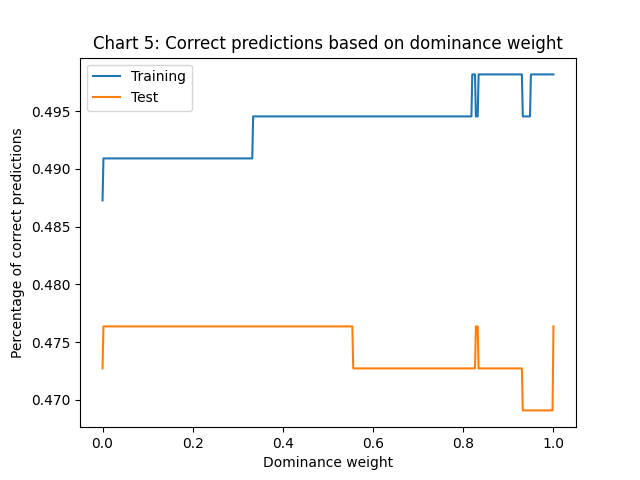

In [20]:
# Graph the results of the combinations
fig, ax = plt.subplots()

x = [i/trials for i in range(0, trials+1)]
y = results
y2 = result_test

ax.plot(x, y, label='Training')
ax.plot(x, y2, label='Test')

ax.set_xlabel('Dominance weight')
ax.set_ylabel('Percentage of correct predictions')

ax.set_title('Chart 5: Correct predictions based on dominance weight')

ax.legend()

# Third Order Dominance?

Best combination: (0.84, 0.18, -0.019999999999999962) (0.19%)


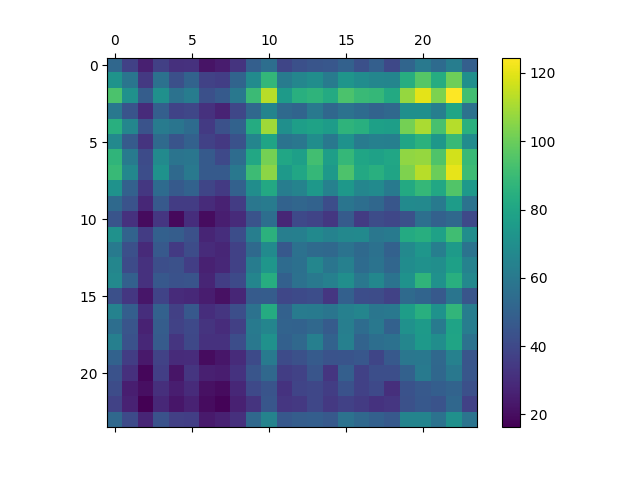

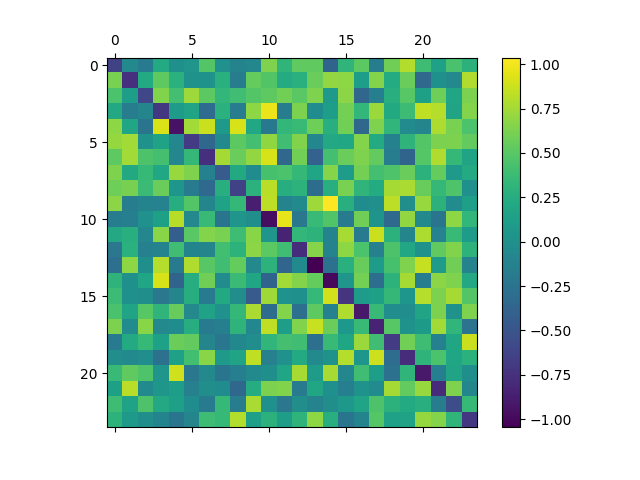

In [21]:
# Calculate a third order dominance matrix and find the best combination of first, second, and third order dominance
third_order_dominance_matrix = np.matmul(second_order_dominance_matrix, dominance_matrix)
best_combination = None
best_percentage = 0

trials = 100

combinations = []
results = []
result_test = []

for i in range(0, trials+1):
    for j in range(0, trials+1):
        dominance_weight = i/trials
        second_order_weight = j/trials
        third_order_weight = 1 - dominance_weight - second_order_weight
        combination = dominance_weight * dominance_matrix + second_order_weight * second_order_dominance_matrix + third_order_weight * third_order_dominance_matrix
        percentage = test_for_matrix_correct_prediction(combination, training_data)
        
        combinations.append((dominance_weight, second_order_weight, third_order_weight))
        results.append(percentage)
        result_test.append(test_for_matrix_correct_prediction(combination, test_data))

        if percentage > best_percentage:
            best_percentage = percentage
            best_combination = (dominance_weight, second_order_weight, third_order_weight)
    
print(f'Best combination: {best_combination} ({best_percentage/len(test_data)*100:.2f}%)')

# Graph the third order dominance matrix
fig, ax = plt.subplots()

cax = ax.matshow(third_order_dominance_matrix, cmap='viridis')

fig.colorbar(cax)

# Graph the final matrix
fig, ax = plt.subplots()

cax = ax.matshow(
    best_combination[0] * dominance_matrix + 
    best_combination[1] * second_order_dominance_matrix + 
    best_combination[2] * third_order_dominance_matrix
    , cmap='viridis')

fig.colorbar(cax)


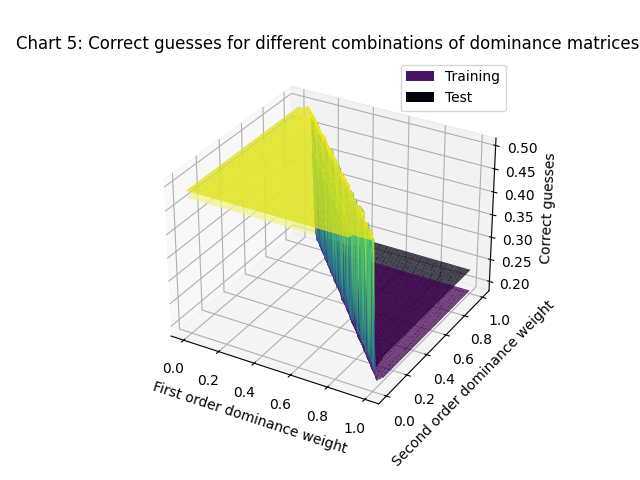

In [22]:
# Graph the results of the combinations in 3D surface plot
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

x = [combination[0] for combination in combinations]
y = [combination[1] for combination in combinations]
z = results
z1 = result_test

ax.plot_trisurf(x, y, z, cmap='viridis', label='Training')
ax.plot_trisurf(x, y, z1, cmap='inferno', label='Test')

ax.set_xlabel('First order dominance weight')
ax.set_ylabel('Second order dominance weight')
ax.set_zlabel('Correct guesses')

ax.set_title('Chart 5: Correct guesses for different combinations of dominance matrices')

ax.legend()


In [23]:
# Calculate what the best order of dominance is
best_order = None
best_percentage = 0

trials = 100

results = []
result_test = []

for i in range(0, trials+1):
    matrix = np.linalg.matrix_power(dominance_matrix, i)
    percentage = test_for_matrix_correct_prediction(matrix, training_data)

    results.append(percentage)
    result_test.append(test_for_matrix_correct_prediction(matrix, test_data))

    if percentage > best_percentage:
        best_percentage = percentage
        best_order = i

print(f'Best order: {best_order} ({best_percentage/len(test_data)*100:.2f}%)')

Best order: 1 (0.18%)


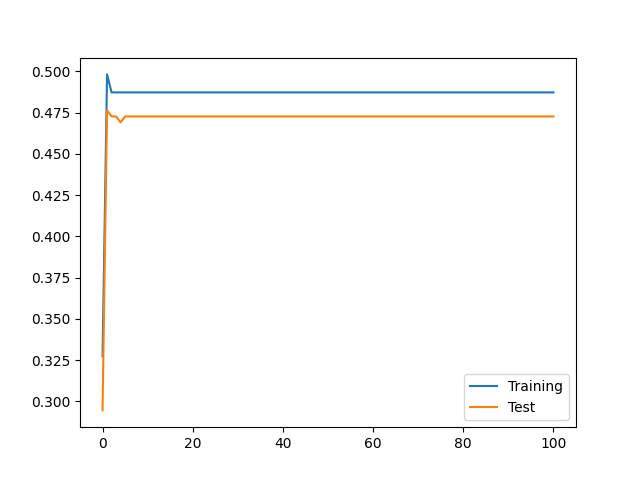

In [24]:
# Graph the different orders of dominance
fig, ax = plt.subplots()

x = [i for i in range(0, trials+1)]
y = results
y2 = result_test

ax.plot(x, y, label='Training')
ax.plot(x, y2, label='Test')

ax.legend()


In [25]:
# For every match in the training data find the matching match from the test data and check whether the winner is the same

number_of_matches = 0
number_of_misses = 0

miss_score_diff = []
score_diff_previous_diff = {}

for match in training_data:
    for test_match in test_data:
        if match['Team 1'] == test_match['Team 2'] and match['Team 2'] == test_match['Team 1']:
            if match['Winner'] != test_match['Winner']:
                # print(f'Match {match} does not match {test_match}')
                number_of_misses += 1
                diff = abs(match['Scores'][0] - match['Scores'][1])
                miss_score_diff.append(diff)
                prev_diff = abs(test_match['Scores'][0] - test_match['Scores'][1])
                if diff in score_diff_previous_diff:
                    score_diff_previous_diff[diff].append(prev_diff)
                else:
                    score_diff_previous_diff[diff] = [prev_diff]
                break
            number_of_matches += 1

print(f'Number of matches: {number_of_matches}')
print(f'Number of misses: {number_of_misses}')

Number of matches: 96
Number of misses: 177


<BarContainer object of 5 artists>

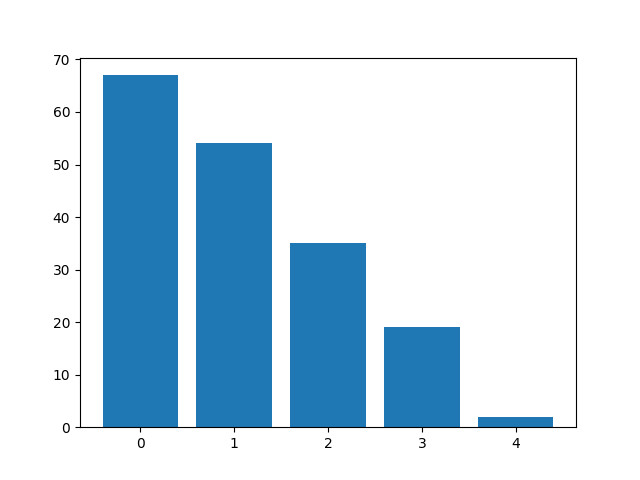

In [26]:
# Graph the score differences
fig, ax = plt.subplots()

x = sorted(set(miss_score_diff))
y = [miss_score_diff.count(diff) for diff in x]

ax.bar(x, y)


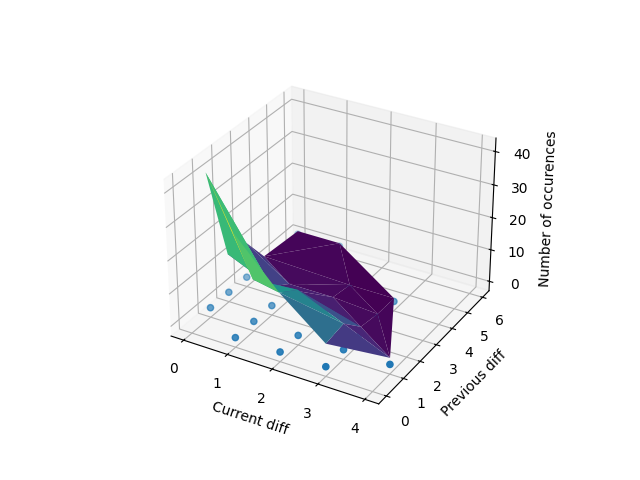

In [27]:
# Plot current diff vs previous diff for incorrect points

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

x = []
y = []
z = []

for (diff, prev_diffs) in score_diff_previous_diff.items():
    for prev_diff in set(prev_diffs):
        x.append(diff)
        y.append(prev_diff)
        z.append(score_diff_previous_diff[diff].count(prev_diff))

ax.plot_trisurf(x, y, z, cmap='viridis')

ax.set_xlabel('Current diff')
ax.set_ylabel('Previous diff')
ax.set_zlabel('Number of occurences')

ax.scatter(x, y)

In [28]:
# Supremacy matrix
supremacy = dominance_matrix + second_order_dominance_matrix

Text(0.5, 1.0, 'Chart 6: Score difference vs dominance difference')

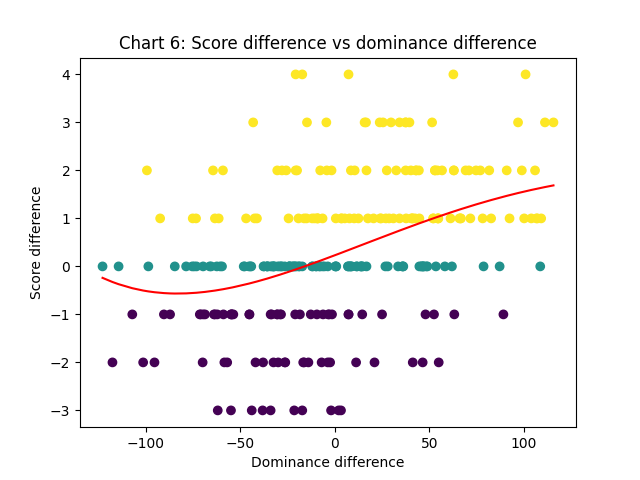

In [29]:
# Graph the difference in score over the difference in dominance
fig, ax = plt.subplots()

x = [calc_dominance(supremacy, match['Team 1']) - calc_dominance(supremacy, match['Team 2']) for match in training_data]
y = [int(match['Scores'][0]) - int(match['Scores'][1]) for match in training_data]
c = [1 if match['Winner'] == match['Team 1'] else -1 if match['Winner'] == match['Team 2'] else 0 for match in training_data]

ax.scatter(x, y, c=c, cmap='viridis')

# Add a curve of best fit
x_set = np.array(sorted(set(x)))
coef = np.polynomial.polynomial.polyfit(x, y, 4)
ffit = np.polynomial.polynomial.polyval(x_set, coef)
ax.plot(x_set, ffit, 'r')

ax.set_xlabel('Dominance difference')
ax.set_ylabel('Score difference')

ax.set_title('Chart 6: Score difference vs dominance difference')


In [30]:
correct_guesses = 0
correct_winners = 0

for match in test_data:
    team1_dominance = calc_dominance(supremacy, match['Team 1'])
    team2_dominance = calc_dominance(supremacy, match['Team 2'])

    predicted_score_diff = np.polynomial.polynomial.polyval(team1_dominance - team2_dominance, coef)
    predicted_score_diff = round(predicted_score_diff)

    if predicted_score_diff == int(match['Scores'][0]) - int(match['Scores'][1]):
        correct_guesses += 1
    
    # Take note of if the winning team prediction was correct
    if (predicted_score_diff > 0 and match['Winner'] == match['Team 1']) or (predicted_score_diff == 0 and match['Winner'] == "tie") or (predicted_score_diff < 0 and match['Winner'] == match['Team 2']):
        correct_winners += 1

print(f'Correct guesses: {correct_guesses} ({correct_guesses/len(test_data)*100:.2f}%)')
print(f'Correct winners: {correct_winners} ({correct_winners/len(test_data)*100:.2f}%)')

Correct guesses: 88 (32.00%)
Correct winners: 117 (42.55%)


Text(0.5, 1.0, 'Chart 7: Score difference vs dominance difference')

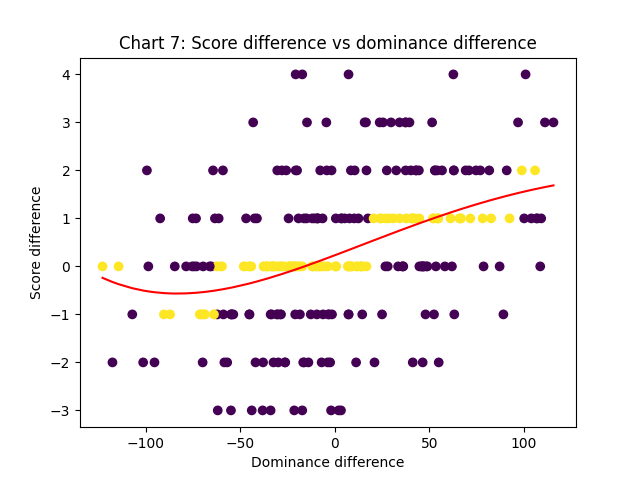

In [31]:
# Graph the difference in score over the difference in dominance
fig, ax = plt.subplots()

x = [calc_dominance(supremacy, match['Team 1']) - calc_dominance(supremacy, match['Team 2']) for match in training_data]
y = [int(match['Scores'][0]) - int(match['Scores'][1]) for match in training_data]

# Add a curve of best fit
x_set = np.array(sorted(set(x)))
coef = np.polynomial.polynomial.polyfit(x, y, 4)
ffit = np.polynomial.polynomial.polyval(x_set, coef)
ax.plot(x_set, ffit, 'r')

def prediction_correct(match):
    team1_dominance = calc_dominance(supremacy, match['Team 1'])
    team2_dominance = calc_dominance(supremacy, match['Team 2'])

    predicted_score_diff = np.polynomial.polynomial.polyval(team1_dominance - team2_dominance, coef)
    predicted_score_diff = round(predicted_score_diff)

    return predicted_score_diff == int(match['Scores'][0]) - int(match['Scores'][1])

# Colour based on if it was predicted correctly
c = [1 if prediction_correct(match) else 0 for match in training_data]

ax.scatter(x, y, c=c, cmap='viridis')


ax.set_xlabel('Dominance difference')
ax.set_ylabel('Score difference')

ax.set_title('Chart 7: Score difference vs dominance difference')


# Model 2

In [47]:
# Find the minimum and maximum score difference
min_score_diff = min([int(match['Scores'][0]) - int(match['Scores'][1]) for match in training_data])
max_score_diff = max([int(match['Scores'][0]) - int(match['Scores'][1]) for match in training_data])

# Calculate the scaled score difference
for match in training_data:
    match['Scaled Score Difference'] = (int(match['Scores'][0]) - int(match['Scores'][1])) / (max_score_diff - min_score_diff)


Text(0.5, 1.0, 'Chart 8: Scaled score difference matrix')

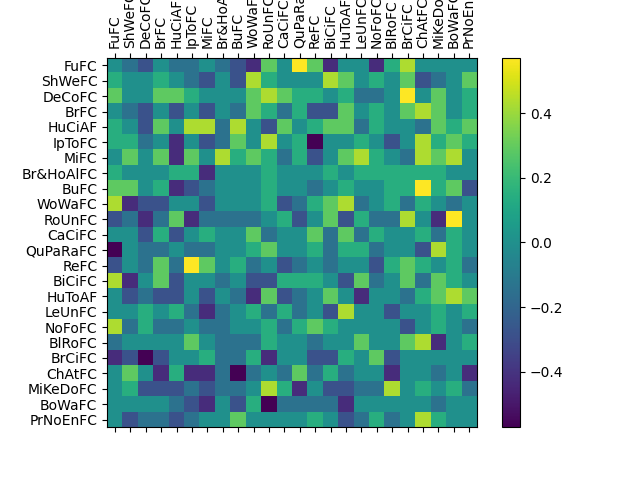

In [48]:
# Create the matrix using the scaled score difference
scaled_matrix = np.zeros((len(teams), len(teams)))

for match in training_data:
    team1 = sorted_teams.index(match['Team 1'])
    team2 = sorted_teams.index(match['Team 2'])
    
    scaled_matrix[team1][team2] = match['Scaled Score Difference']
    scaled_matrix[team2][team1] = -match['Scaled Score Difference']

# Graph the scaled matrix
fig, ax = plt.subplots()

cax = ax.matshow(scaled_matrix, cmap='viridis')

fig.colorbar(cax)

ax.set_xticks(np.arange(len(teams)))
ax.set_yticks(np.arange(len(teams)))

ax.set_xticklabels(sorted_teams, rotation=90)
ax.set_yticklabels(sorted_teams)

ax.set_title('Chart 8: Scaled score difference matrix')

Best combination: (0.888, 0.11199999999999999) (50.55%)


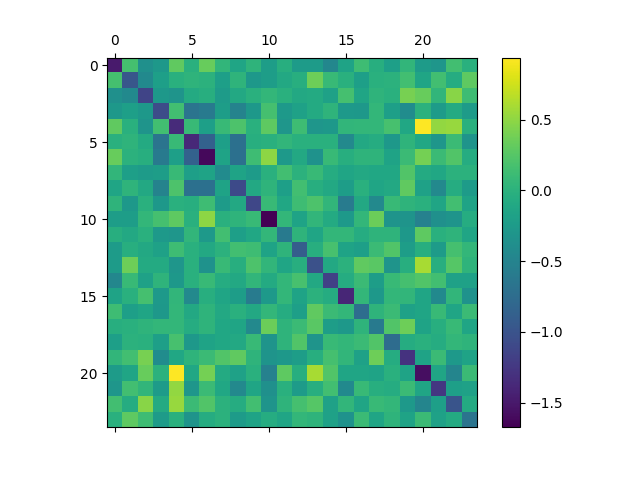

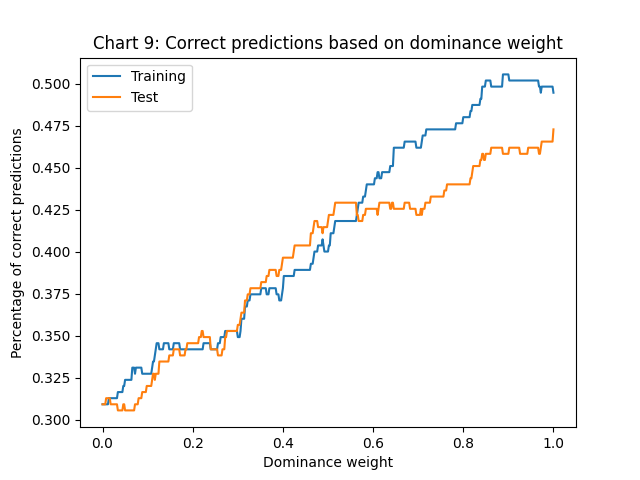

In [49]:
second_order_scaled_matrix = np.matmul(scaled_matrix, scaled_matrix)

# Graph the second order scaled matrix
fig, ax = plt.subplots()

cax = ax.matshow(second_order_scaled_matrix, cmap='viridis')

fig.colorbar(cax)

# Calculate the best combination of first and second order dominance based on the training data

best_combination = None
best_percentage = 0

trials = 500

results = []
result_test = []

for i in range(0, trials+1):
    dominance_weight = i/trials
    second_order_weight = 1 - dominance_weight
    combination = dominance_weight * scaled_matrix + second_order_weight * second_order_scaled_matrix
    percentage = test_for_matrix_correct_prediction(combination, training_data)
    
    results.append(percentage)
    result_test.append(test_for_matrix_correct_prediction(combination, test_data))

    if percentage > best_percentage:
        best_percentage = percentage
        best_combination = (dominance_weight, second_order_weight)

print(f'Best combination: {best_combination} ({best_percentage*100:.2f}%)')

# Graph the results of the combinations
fig, ax = plt.subplots()

x = [i/trials for i in range(0, trials+1)]
y = results
y2 = result_test

ax.plot(x, y, label='Training')
ax.plot(x, y2, label='Test')

ax.set_xlabel('Dominance weight')
ax.set_ylabel('Percentage of correct predictions')

ax.set_title('Chart 9: Correct predictions based on dominance weight')

ax.legend()

Best order: 1 (49.45%)


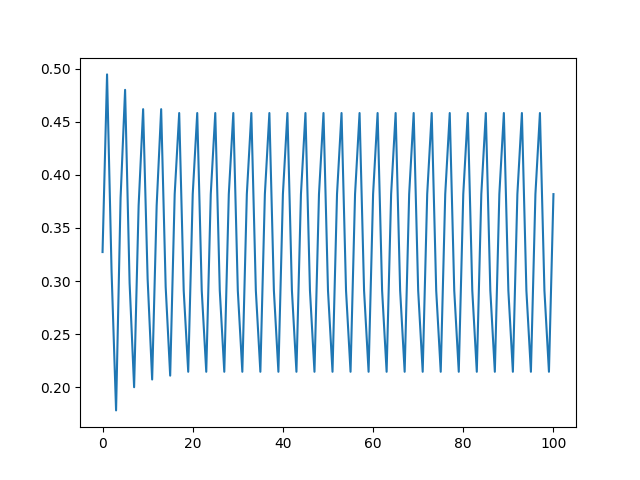

In [50]:
# Find the best order of dominance
best_order = None
best_percentage = 0

trials = 100

results = []

for i in range(0, trials+1):
    matrix = np.linalg.matrix_power(scaled_matrix, i)
    percentage = test_for_matrix_correct_prediction(matrix, training_data)

    results.append(percentage)

    if percentage > best_percentage:
        best_percentage = percentage
        best_order = i

print(f'Best order: {best_order} ({best_percentage*100:.2f}%)')

# Graph the different orders of dominance
fig, ax = plt.subplots()

x = [i for i in range(0, trials+1)]
y = results

ax.plot(x, y)

Text(0.5, 1.0, 'Chart 6: Score difference vs dominance difference')

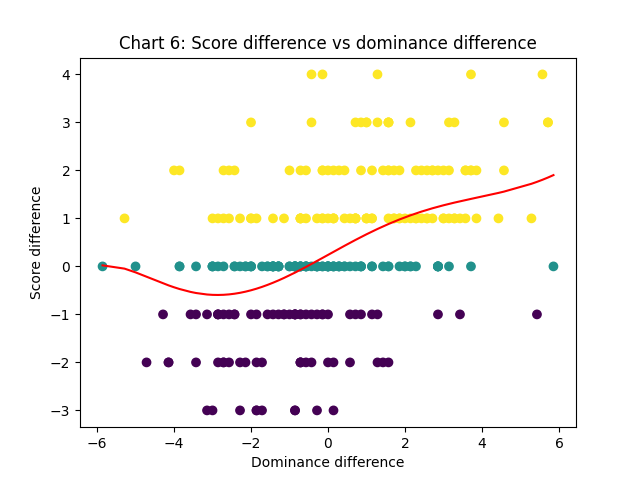

In [70]:
# Graph the difference in score over the difference in dominance
fig, ax = plt.subplots()

x = [calc_dominance(scaled_matrix, match['Team 1']) - calc_dominance(scaled_matrix, match['Team 2']) for match in training_data]
y = [int(match['Scores'][0]) - int(match['Scores'][1]) for match in training_data]
c = [1 if match['Winner'] == match['Team 1'] else -1 if match['Winner'] == match['Team 2'] else 0 for match in training_data]

ax.scatter(x, y, c=c, cmap='viridis')

# Add a curve of best fit
x_set = np.array(sorted(set(x)))
coef = np.polynomial.polynomial.polyfit(x, y, 6)
ffit = np.polynomial.polynomial.polyval(x_set, coef)
ax.plot(x_set, ffit, 'r')

ax.set_xlabel('Dominance difference')
ax.set_ylabel('Score difference')

ax.set_title('Chart 6: Score difference vs dominance difference')


In [68]:
# Find the best polynomial fit for the scaled matrix
best_order = None
best_percentage = 0

trials = 100

results = []

for i in range(0, trials+1):
    coef = np.polynomial.polynomial.polyfit(x, y, i)
    correct_guesses = 0

    for match in test_data:
        team1_dominance = calc_dominance(scaled_matrix, match['Team 1'])
        team2_dominance = calc_dominance(scaled_matrix, match['Team 2'])

        predicted_score_diff = np.polynomial.polynomial.polyval(team1_dominance - team2_dominance, coef)
        predicted_score_diff = round(predicted_score_diff)

        if predicted_score_diff == int(match['Scores'][0]) - int(match['Scores'][1]):
            correct_guesses += 1

    percentage = correct_guesses / len(test_data)
    results.append(percentage)

    if percentage > best_percentage:
        best_percentage = percentage
        best_order = i

print(f'Best order: {best_order} ({best_percentage*100:.2f}%)')


c:\Users\userj\Github\School\psmt-yr12\specialist\.venv\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


Best order: 6 (31.64%)


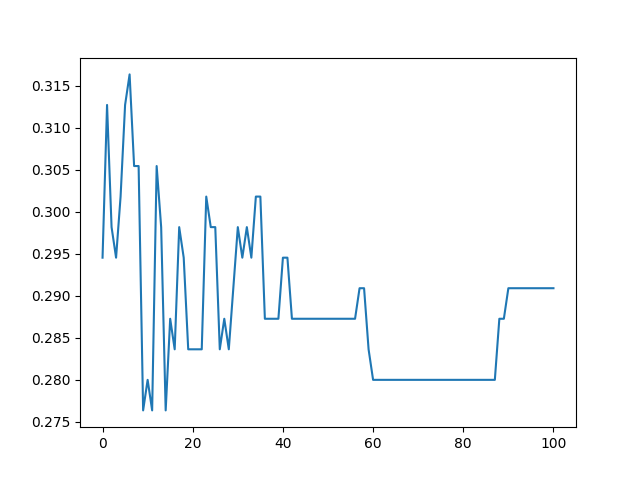

In [69]:
# Graph the different polynomial orders
fig, ax = plt.subplots()

x = [i for i in range(0, trials+1)]
y = results

ax.plot(x, y)


In [72]:
correct_guesses = 0
correct_winners = 0

for match in test_data:
    team1_dominance = calc_dominance(scaled_matrix, match['Team 1'])
    team2_dominance = calc_dominance(scaled_matrix, match['Team 2'])

    predicted_score_diff = np.polynomial.polynomial.polyval(team1_dominance - team2_dominance, coef)
    predicted_score_diff = round(predicted_score_diff)

    if predicted_score_diff == int(match['Scores'][0]) - int(match['Scores'][1]):
        correct_guesses += 1
    
    # Take note of if the winning team prediction was correct
    if (predicted_score_diff > 0 and match['Winner'] == match['Team 1']) or (predicted_score_diff == 0 and match['Winner'] == "tie") or (predicted_score_diff < 0 and match['Winner'] == match['Team 2']):
        correct_winners += 1

print(f'Correct guesses: {correct_guesses} ({correct_guesses/len(test_data)*100:.2f}%)')
print(f'Correct winners: {correct_winners} ({correct_winners/len(test_data)*100:.2f}%)')

Correct guesses: 87 (31.64%)
Correct winners: 122 (44.36%)


Text(0.5, 1.0, 'Chart 7: Score difference vs dominance difference')

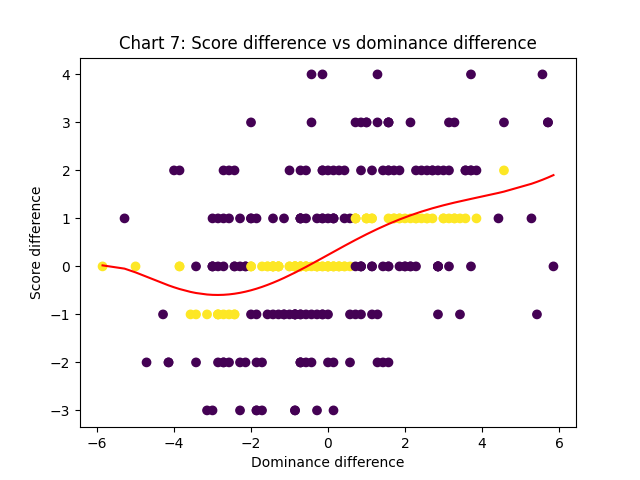

In [75]:
# Graph the difference in score over the difference in dominance
fig, ax = plt.subplots()

x = [calc_dominance(scaled_matrix, match['Team 1']) - calc_dominance(scaled_matrix, match['Team 2']) for match in training_data]
y = [int(match['Scores'][0]) - int(match['Scores'][1]) for match in training_data]

# Add a curve of best fit
x_set = np.array(sorted(set(x)))
coef = np.polynomial.polynomial.polyfit(x, y, 6)
ffit = np.polynomial.polynomial.polyval(x_set, coef)
ax.plot(x_set, ffit, 'r')

def prediction_correct(match):
    team1_dominance = calc_dominance(scaled_matrix, match['Team 1'])
    team2_dominance = calc_dominance(scaled_matrix, match['Team 2'])

    predicted_score_diff = np.polynomial.polynomial.polyval(team1_dominance - team2_dominance, coef)
    predicted_score_diff = round(predicted_score_diff)

    return predicted_score_diff == int(match['Scores'][0]) - int(match['Scores'][1])

# Colour based on if it was predicted correctly
c = [1 if prediction_correct(match) else 0 for match in training_data]

ax.scatter(x, y, c=c, cmap='viridis')


ax.set_xlabel('Dominance difference')
ax.set_ylabel('Score difference')

ax.set_title('Chart 7: Score difference vs dominance difference')
